In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('./regression_data.csv')

In [4]:
df.columns

Index(['unique_id', 'number_injured', 'month', 'day_of_week', 'time_cat',
       'primary_rd', 'weather_1', 'collision_severity', 'type_of_collision',
       'mviw', 'road_surface', 'lighting', 'intersection',
       'party1_move_pre_acc', 'party2_move_pre_acc'],
      dtype='object')

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Prepare the data
X = df.drop(columns=['unique_id', 'number_injured', 'primary_rd'])  # Exclude 'unique_id', 'number_injured', and 'primary_rd'
y = df['number_injured']
X = X.applymap(str)  # Convert all data to string type to avoid issues during encoding

# Define the preprocessing and model pipeline
categorical_columns = X.columns.tolist()  # Assuming all remaining columns are categorical after exclusions
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the testing set and evaluate
y_pred = pipeline.predict(X_test)
test_r2_score = r2_score(y_test, y_pred)

# Perform cross-validation
cv_r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Display the evaluation results
print(f"Test R-squared: {test_r2_score}")
print(f"Mean Cross-Validation R-squared: {cv_r2_scores.mean()}")

# Note: Update the file path and potentially adjust the list of categorical columns based on your dataset.


Test R-squared: 0.12151576542125087
Mean Cross-Validation R-squared: 0.0993115642608305


# Random Forests

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset
# df = pd.read_csv('/path/to/your/regression_data.csv')  # Update the path to your dataset
df=pd.read_csv('./regression_data.csv')

# Prepare the data
X = df.drop(columns=['unique_id', 'number_injured', 'primary_rd'])  # Exclude 'unique_id', 'number_injured', and 'primary_rd'
y = df['number_injured']
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Encoding categorical variables
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

X_encoded = preprocessor.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Random Forest model for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature names after one-hot encoding
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features)

# Print feature importance
importances = rf.feature_importances_
importance_dict = dict(zip(feature_names, importances))
print("Feature importances:", sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))


Feature importances: [('mviw_Motor Vehicle', 0.0840407643860472), ('time_cat_10:01 am to 2:00 pm', 0.030694727807810702), ('day_of_week_Friday', 0.026894337792600725), ('time_cat_2:01 pm to 6:00 pm', 0.02533273967277629), ('day_of_week_Tuesday', 0.02522990153747272), ('time_cat_6:01 pm to 10:00 pm', 0.023967985152138615), ('month_December', 0.023130308635224438), ('day_of_week_Wednesday', 0.022192995677817424), ('month_July', 0.021657640855439614), ('day_of_week_Monday', 0.021303959156673623), ('day_of_week_Saturday', 0.020615323036341834), ('month_June', 0.020163095512947024), ('month_October', 0.02004654353118474), ('intersection_Intersection <= 20ft', 0.02002969814645247), ('time_cat_6:01 am to 10:00 am', 0.019830124131831578), ('intersection_Midblock > 20ft', 0.019533177412478345), ('month_August', 0.019523720498717242), ('month_April', 0.01844829436220523), ('month_May', 0.01834307981180752), ('day_of_week_Thursday', 0.01817277381000368), ('weather_1_Cloudy', 0.017607776000059094)

In [17]:
top_10_importances = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)[:10]

# Print the top 10 feature importances
print("Top 10 Feature importances:")
for feature, importance in top_10_importances:
    print(f"{feature}: {importance}")

Top 10 Feature importances:
mviw_Motor Vehicle: 0.0840407643860472
time_cat_10:01 am to 2:00 pm: 0.030694727807810702
day_of_week_Friday: 0.026894337792600725
time_cat_2:01 pm to 6:00 pm: 0.02533273967277629
day_of_week_Tuesday: 0.02522990153747272
time_cat_6:01 pm to 10:00 pm: 0.023967985152138615
month_December: 0.023130308635224438
day_of_week_Wednesday: 0.022192995677817424
month_July: 0.021657640855439614
day_of_week_Monday: 0.021303959156673623


# Correlation Analysis 

This snippet shows how to conduct correlation analysis between numerical features and the target variable.

In [16]:

df=pd.read_csv('./regression_data.csv')

# Prepare the data
X = df.drop(columns=['unique_id', 'number_injured', 'primary_rd'])  # Exclude 'unique_id', 'number_injured', and 'primary_rd'

# Assuming df is your DataFrame and 'number_injured' is the target variable
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['number_injured','unique_id'])

# Compute correlations
correlations = df[numerical_features].corrwith(df['number_injured'])
print("Correlations with number_injured:\n", correlations.sort_values(ascending=False))

from scipy import stats

# Example for a single categorical feature 'category_feature'
f_values, p_values = {}, {}
for categorical_feature in df.select_dtypes(include=['object', 'category']).columns:
    categories = df[categorical_feature].unique()
    samples = [df[df[categorical_feature] == category]['number_injured'] for category in categories if not df[df[categorical_feature] == category].empty]
    f_value, p_value = stats.f_oneway(*samples)
    f_values[categorical_feature] = f_value
    p_values[categorical_feature] = p_value

print("ANOVA F-values:\n", f_values)
print("ANOVA P-values:\n", p_values)

Correlations with number_injured:
 Series([], dtype: float64)
ANOVA F-values:
 {'month': 3.551619580175034, 'day_of_week': 38.21065210239013, 'time_cat': 20.872345239787546, 'primary_rd': 1.325674677432053, 'weather_1': 5.738233626792441, 'collision_severity': 207.8168043491085, 'type_of_collision': 429.0314749103793, 'mviw': 762.5922058949282, 'road_surface': 5.859030349658049, 'lighting': 5.445983662419738, 'intersection': 264.32604949153307, 'party1_move_pre_acc': 52.97912338839784, 'party2_move_pre_acc': 58.68882054839172}
ANOVA P-values:
 {'month': 5.179031976020476e-05, 'day_of_week': 1.3663817627782198e-46, 'time_cat': 6.6427343017393614e-21, 'primary_rd': 3.2793944595021323e-13, 'weather_1': 5.579705355854535e-06, 'collision_severity': 2.4160505413305054e-177, 'type_of_collision': 0.0, 'mviw': 0.0, 'road_surface': 0.0001037994423009669, 'lighting': 5.1583302266720006e-05, 'intersection': 2.645383670413735e-59, 'party1_move_pre_acc': 8.148021422608112e-169, 'party2_move_pre_acc'

In [18]:
# Presenting ANOVA results beautifully
print("Significant ANOVA Results (P < 0.05):")
print("{:<20} {:<15} {:<10}".format("Feature", "F-value", "P-value"))
for feature in f_values.keys():
    if p_values[feature] < 0.05:  # Consider P < 0.05 as significant
        print("{:<20} {:<15} {:<10}".format(feature, round(f_values[feature], 3), round(p_values[feature], 3)))


Significant ANOVA Results (P < 0.05):
Feature              F-value         P-value   
month                3.552           0.0       
day_of_week          38.211          0.0       
time_cat             20.872          0.0       
primary_rd           1.326           0.0       
weather_1            5.738           0.0       
collision_severity   207.817         0.0       
type_of_collision    429.031         0.0       
mviw                 762.592         0.0       
road_surface         5.859           0.0       
lighting             5.446           0.0       
intersection         264.326         0.0       
party1_move_pre_acc  52.979          0.0       
party2_move_pre_acc  58.689          0.0       


# Target Encoding

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import category_encoders as ce

# Load your dataset
df = pd.read_csv('./regression_data.csv')  # Update this path

# Define your features and target variable
X = df.drop(['number_injured','unique_id'], axis=1)  # Adjust if 'number_injured' is your target and included in 'df'
y = df['number_injured']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying categorical columns - adjust this based on your actual categorical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define and apply target encoding
target_encoder = ce.TargetEncoder(cols=categorical_features)
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Initialize and fit the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

# Predictions and evaluation
y_train_pred = model.predict(X_train_encoded)
y_test_pred = model.predict(X_test_encoded)

# Calculate R-squared and OOS R-squared
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)
print(f"R-squared (Train): {r_squared_train}")
print(f"R-squared (Test/OOS): {r_squared_test}")

# Feature importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train_encoded.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display top features based on importance
print("Top Feature Importances:")
print(feature_importances.head(10))


R-squared (Train): 0.854986323754572
R-squared (Test/OOS): 0.01753247763017929
Top Feature Importances:
                     importance
primary_rd             0.253708
month                  0.148670
day_of_week            0.103411
mviw                   0.096581
time_cat               0.086547
party1_move_pre_acc    0.061849
party2_move_pre_acc    0.053914
type_of_collision      0.046725
collision_severity     0.036729
lighting               0.035196


In [2]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model_cv = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply target encoding within cross-validation
# Note: It's crucial to fit the encoder within each fold to avoid data leakage
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class TargetEncoderWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.encoder = None
        
    def fit(self, X, y=None):
        self.encoder = ce.TargetEncoder(cols=self.cols)
        self.encoder.fit(X, y)
        return self
    
    def transform(self, X):
        return self.encoder.transform(X)

# Create a pipeline
pipeline_cv = Pipeline(steps=[
    ('target_encoding', TargetEncoderWrapper(cols=categorical_features)),
    ('model', model_cv)
])

# Perform cross-validation
scores = cross_val_score(pipeline_cv, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {scores.mean()} ± {scores.std()}")


Cross-validated R-squared: -0.0035003103891094733 ± 0.026926478989427616


In [109]:
df_col =pd.read_excel('./final.xlsx')  # Update the path

In [110]:
df_col.columns

Index(['unique_id', 'number_killed', 'number_injured', 'tb_latitude',
       'tb_longitude', 'geocode_source', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'primary_rd', 'weather_1', 'weather_2', 'collision_severity',
       'type_of_collision', 'mviw', 'ped_action', 'road_surface',
       'road_cond_1', 'road_cond_2', 'lighting', 'control_device',
       'intersection', 'vz_pcf_code', 'dph_col_grp', 'dph_col_grp_description',
       'party1_move_pre_acc', 'party2_move_pre_acc'],
      dtype='object')

In [112]:
df_col.head(5)

,unique_id,number_killed,number_injured,tb_latitude,tb_longitude,geocode_source,collision_date,collision_time,accident_year,month,...,road_cond_1,road_cond_2,lighting,control_device,intersection,vz_pcf_code,dph_col_grp,dph_col_grp_description,party1_move_pre_acc,party2_move_pre_acc
0,22297,0.0,1,37.775530,-122.437963,SFPD-CROSSROADS,2005 April 01,14:43:00,2005,April,...,No Unusual Condition,Not Stated,Daylight,NaN,Midblock > 20ft,21955,BB,Vehicle-Pedestrian,Proceeding Straight,Proceeding Straight
1,23142,0.0,1,37.783882,-122.395703,SFPD-CROSSROADS,2005 April 01,23:37:00,2005,April,...,No Unusual Condition,Not Stated,Dark - Street Lights,NaN,Intersection <= 20ft,22102,AA,Vehicle(s) Only Involved,Making U Turn,Proceeding Straight
2,11233,0.0,1,37.761700,-122.421599,SFPD-CROSSROADS,2005 April 01,15:38:00,2005,April,...,No Unusual Condition,Not Stated,Daylight,Functioning,Intersection <= 20ft,22350,BB,Vehicle-Pedestrian,Proceeding Straight,Stopped
3,11724,0.0,1,37.763583,-122.417333,SFPD-CROSSROADS,2005 April 01,21:16:00,2005,April,...,No Unusual Condition,Not Stated,Dark - Street Lights,Functioning,Intersection <= 20ft,21950(a),BB,Vehicle-Pedestrian,Making Right Turn,Proceeding Straight
4,3617,0.0,4,37.732949,-122.404657,SFPD-CROSSROADS,2005 April 01,12:25:00,2005,April,...,No Unusual Condition,Not Stated,Daylight,Functioning,Intersection <= 20ft,21801(a),AA,Vehicle(s) Only Involved,Making Left Turn,Proceeding Straight


# Logistic Regression

<br>

['month', 'day_of_week', 'weather_1'] - Basic time and weather conditions.<br>
['lighting', 'road_surface', 'weather_1'] - Environmental conditions.<br>
['type_of_collision', 'mviw'] - Collision type and involved party.<br>
['time_cat', 'intersection'] - Time of day and intersection type.<br>
['day_of_week', 'type_of_collision', 'lighting'] - Weekly pattern, collision type, and lighting.<br>
['weather_1', 'road_surface', 'lighting', 'intersection'] - Comprehensive environmental conditions.<br>
['month', 'day_of_week', 'type_of_collision', 'mviw', 'weather_1'] - Time, collision type, involved party, and weather.<br>
['time_cat', 'type_of_collision', 'lighting', 'road_surface'] - Time of day, collision type, and environmental conditions.<br>
['mviw', 'intersection', 'lighting'] - Involved party, intersection type, and lighting.<br>
['day_of_week', 'weather_1', 'road_surface', 'lighting', 'type_of_collision'] - Weekly pattern with environmental conditions and collision<br> type.

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.metrics import precision_score, recall_score


# Load the dataset
df =pd.read_excel('./final.xlsx')  # Update the path

# Map 'collision_severity' to binary 'level'
df['level'] = df['collision_severity'].map({
    'Injury (Severe)': 1, 'Fatal': 1, 'Medical': 1,
    'Injury (Other Visible)': 0, 'Injury (Complaint of Pain)': 0
})

# Preprocessing: Dropping unnecessary columns
df.drop(['unique_id', 'number_injured', 'collision_severity'], axis=1, inplace=True)

# Define combinations of columns to test, including and excluding 'primary_rd'
feature_combinations = [
    # ['month', 'day_of_week', 'weather_1'],
    # ['lighting', 'road_surface', 'weather_1'],
    # ['type_of_collision', 'mviw'],
    # ['time_cat', 'intersection'],
    # ['day_of_week', 'type_of_collision', 'lighting'],
    # ['weather_1', 'road_surface', 'lighting', 'intersection'],
    # ['month', 'day_of_week', 'type_of_collision', 'mviw', 'weather_1'],
    # ['time_cat', 'type_of_collision', 'lighting', 'road_surface'],
    # ['mviw', 'intersection', 'lighting'],
    # ['day_of_week', 'weather_1', 'road_surface', 'lighting', 'type_of_collision'],
    ['party1_move_pre_acc','day_of_week','time_cat','intersection','party2_move_pre_acc','mviw','type_of_collision','lighting', 'road_surface',
       'road_cond_1', 'road_cond_2']
    # Add other combinations as desired
]

results = []

for features in feature_combinations:
    X = df[features]
    y = df['level']

    # Identify if 'primary_rd' is in the current feature set
    if 'primary_rd' in features:
        preprocessor = ColumnTransformer(
            transformers=[
                ('target_encoder', TargetEncoder(), ['primary_rd']),
                ('onehot', OneHotEncoder(handle_unknown='ignore'), [col for col in features if col != 'primary_rd'])
            ],
            remainder='passthrough'
        )
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ('onehot', OneHotEncoder(handle_unknown='ignore'), features)
            ],
            remainder='passthrough'
        )

    # Define the model pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000))
    ])

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fitting the model
    pipeline.fit(X_train, y_train)

    # Predictions and evaluation
    # y_pred_test = pipeline.predict(X_test)

    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Set your custom threshold here
    custom_threshold = 0.5  # For example, change this to your desired threshold
    
    # Apply the custom threshold to determine the class labels
    y_pred_test = (y_pred_prob >= custom_threshold).astype(int)

    # Collecting and printing results
    test_f1 = f1_score(y_test, y_pred_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    # print(f"Features: {', '.join(features)}")
    # print(f"Test F1 Score: {test_f1}, Test Accuracy: {test_accuracy}")
    # print(classification_report(y_test, y_pred_test))
    # Calculate precision and recall
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)


    results.append({
        'Features': ', '.join(features),
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1
    })

# Optionally, convert results to a DataFrame for easier visualization and comparison
results_df = pd.DataFrame(results)



/var/folders/6_/dr76lzfx6k97z9ld6s_cvxs00000gn/T/ipykernel_42658/3741692726.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


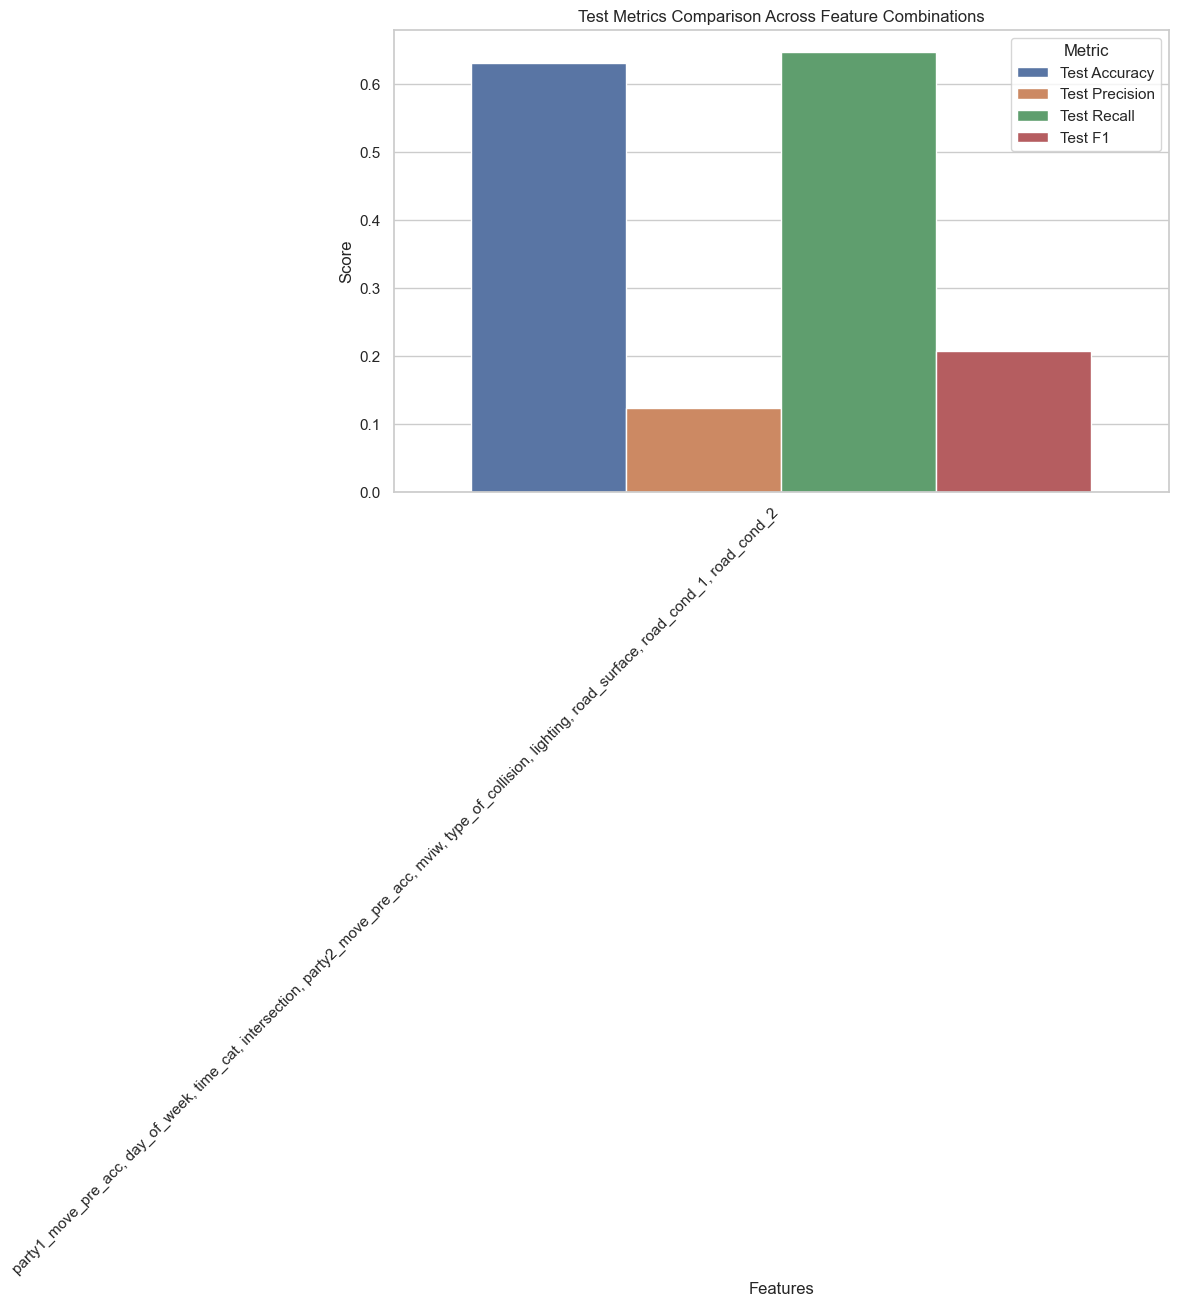

In [120]:
# Melting the DataFrame
df_long = pd.melt(results_df, id_vars=['Features'], var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Features', y='Score', hue='Metric')
plt.xticks(rotation=45, ha="right")
plt.title('Test Metrics Comparison Across Feature Combinations')
plt.tight_layout()
plt.show()



Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate. In your context, it measures how many of the cases predicted as severe injuries (or class 1) were actually severe.


Precision= 
TP+FP
TP
​
 
Example: If your model predicts 100 cases as severe injuries and 12 of them are actually severe, precision is 0.12.
Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all observations in the actual class. It measures the model's ability to capture actual positives. High recall means most of the actual positives are correctly recognized (low false negative rate).


Recall= 
TP+FN
TP
​
 
Example: If there are 928 actual severe injury cases and your model correctly identifies 65% of them, recall is 0.65.
F1 Score: The F1 Score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account. It's particularly useful when you have classes that are imbalanced. F1 will be low if either precision or recall is low.


F1=2⋅ 
Precision+Recall
Precision⋅Recall
​
 
Example: An F1 score of 0.205 indicates a balance between precision and recall for the model's predictions, factoring in both the low precision and relatively higher recall.
Accuracy: Accuracy measures the ratio of correctly predicted observation to the total observations. It's the most intuitive performance measure and it's extremely useful when all classes are equally important.


Accuracy= 
TP+TN+FP+FN
TP+TN
​
 
Example: An accuracy of 0.596 means that about 60% of all predictions (severe and not severe) made by the model are correct.
In your specific case, while accuracy seems relatively high, the low precision alongside a higher recall for the positive class (severe injuries) suggests the model has a high false positive rate but a good capability of identifying most of the actual positive cases. The low F1 score indicates an imbalance between precision and recall, reflecting the model's struggle to balance the trade-off between these metrics effectively.








In [122]:
# features = ['party1_move_pre_acc','control_device','month','day_of_week','intersection','party2_move_pre_acc','primary_rd','mviw','type_of_collision']
features=    ['party1_move_pre_acc','day_of_week','time_cat','intersection','party2_move_pre_acc','mviw','type_of_collision','lighting', 'road_surface',
       'road_cond_1', 'road_cond_2']
X = df[features]
y = df['level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['party1_move_pre_acc',
                                                   'day_of_week', 'time_cat',
                                                   'intersection',
                                                   'party2_move_pre_acc',
                                                   'mviw', 'type_of_collision',
                                                   'lighting', 'road_surface',
                                                   'road_cond_1',
                                                   'road_cond_2'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

In [123]:
# Access the fitted LogisticRegression model
model = pipeline.named_steps['classifier']
import numpy as np

# Get the coefficients
coefficients = model.coef_[0]

# Correctly get feature names for scikit-learn 0.24 and later
feature_names = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out()

# Map coefficients to feature names
coef_dict = dict(zip(feature_names, coefficients))

print("Model Coefficients:")
print("Odds - Severe Injury to Minor Injuries\n")

for feature, coef in coef_dict.items():
    odds = np.exp(coef)
    if odds>1:
        print(f"{feature}:{odds}")





Model Coefficients:
Odds - Severe Injury to Minor Injuries

party1_move_pre_acc_Changing Lanes:1.2485126609081636
party1_move_pre_acc_Entering Traffic:1.163017409770206
party1_move_pre_acc_Others:1.7061290580447879
party1_move_pre_acc_Passing Other Vehicle:1.674394982852046
party1_move_pre_acc_Proceeding Straight:1.2599355115882502
party1_move_pre_acc_Ran Off Road:1.5540023459372274
party1_move_pre_acc_Traveling Wrong Way:1.2903981091239296
day_of_week_nan:1.256512287639502
time_cat_10:01 pm to 2:00 am:1.2148094106988139
time_cat_2:01 am to 6:00 am:1.4839388267054434
time_cat_6:01 pm to 10:00 pm:1.0217586048989424
party2_move_pre_acc_Changing Lanes:1.9188635586861473
party2_move_pre_acc_Making Left Turn:1.1233641046494958
party2_move_pre_acc_Merging:1.6967045504066718
party2_move_pre_acc_Others:1.4692356794524661
party2_move_pre_acc_Parked:1.2008568703366918
party2_move_pre_acc_Proceeding Straight:1.0540604146989
party2_move_pre_acc_Ran Off Road:1.1189818545428627
party2_move_pre_acc_T

In [73]:
# import statsmodels.api as sm
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # Assuming 'df' is your DataFrame and it's already preprocessed

# # Define features and target
# features = ['intersection', 'lighting']
# X = df[features]
# y = df['level']

# # Preprocessing: One-Hot Encoding for categorical variables
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(), features)
#     ],
#     remainder='passthrough'
# )

# # Fit the preprocessor and transform the feature matrix
# X_transformed = preprocessor.fit_transform(X)

# # Assuming X_transformed is the output from preprocessor.fit_transform(X)

# # Convert the sparse matrix to a dense array
# # X_transformed_dense = X_transformed.toarray()

# # Since statsmodels requires adding a constant for the intercept
# X_transformed_with_const = sm.add_constant(X_transformed_dense)

# # Fit the logistic regression model using statsmodels
# model = sm.Logit(y, X_transformed_with_const)
# result = model.fit()

# # # Display the summary
# print(result.summary())


In [1]:
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)

# Assume 'df' is your DataFrame loaded from 'final.xlsx'
# df = pd.read_excel('/path/to/final.xlsx')

# Example DataFrame loading (adjust according to your real dataset)
df = pd.DataFrame({
    'Condition': ['Changing Lanes', 'Entering Traffic', 'Others', 'Passing Other Vehicle'],
    'Odds': [1.2485, 1.1630, 1.7061, 1.6744]
})

# Example Plotly Express chart
fig = px.bar(df, x='Condition', y='Odds', title='Odds of Severe Injury for Different Conditions')

# Define the layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='San Francisco Road Safety Dashboard'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


ImportError: cannot import name 'get_current_traceback' from 'werkzeug.debug.tbtools' (/Users/rishikesanravichandran/miniconda3/envs/epl_analytics/lib/python3.8/site-packages/werkzeug/debug/tbtools.py)